<a href="https://colab.research.google.com/github/samer-glitch/Predicting-Diabetes-and-Assessing-Risk-levels-for-retinopathy-disease-Using-ML/blob/main/Diabetes%20Retinopathy%20disease%20Risk%20Prediction%20and%20Categorization%20using%20Machine%20Learning%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
import pandas as pd

# Load the dataset to perform EDA
data_path = 'diabetes_prediction_dataset.csv'
diabetes_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
print("Shape before removing duplicates:", diabetes_data.shape)
diabetes_data_cleaned = diabetes_data.drop_duplicates()
print("Shape after removing duplicates:", diabetes_data_cleaned.shape)
print("Rows removed:", diabetes_data.shape[0] - diabetes_data_cleaned.shape[0])


Shape before removing duplicates: (100000, 9)
Shape after removing duplicates: (96146, 9)
Rows removed: 3854


In [ ]:
# Check for NaN values in the target variable 'diabetes'
print("Number of NaN values in 'diabetes' column:", diabetes_data_cleaned['diabetes'].isna().sum())
# Re-check the entire dataframe for NaN values
print(diabetes_data_cleaned.isna().sum())

Number of NaN values in 'diabetes' column: 0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Check data types for all columns
print(diabetes_data_cleaned.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


Loading data...
Cleaning data...
Encoding categorical variables...
Splitting data...
Applying SMOTE and scaling...
Training and tuning Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 0.01}
Training and tuning Random Forest...
Best hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Training and tuning XGBoost...
Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
Training and tuning Voting Classifier...


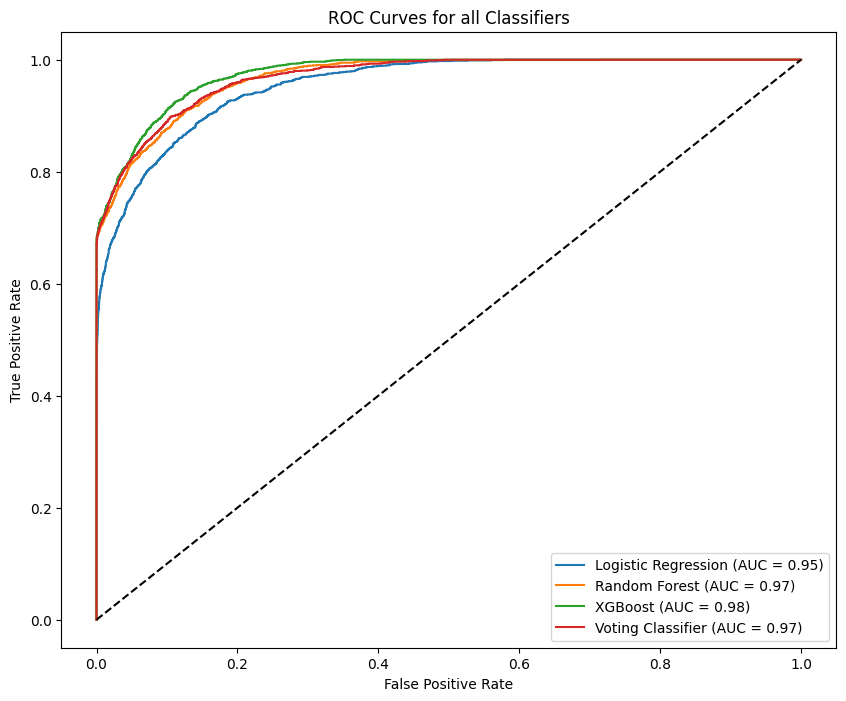

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Running Time (s),Confusion Matrix
0,Logistic Regression,0.879875,0.413080,0.860259,0.558148,0.954829,4.935908,"[[15461, 2073], [237, 1459]]"
1,Random Forest,0.946594,0.667669,0.785377,0.721756,0.968865,882.968163,"[[16871, 663], [364, 1332]]"
2,XGBoost,0.964379,0.841785,0.734080,0.784252,0.975445,45.254451,"[[17300, 234], [451, 1245]]"
3,Voting Classifier,0.955902,0.739008,0.772995,0.755620,0.969480,15.012164,"[[17071, 463], [385, 1311]]"


,Predicted_Logistic Regression,Predicted_Random Forest,Predicted_XGBoost,Predicted_Voting Classifier
82004,1,0,0,0
10542,0,0,0,0
31572,0,0,0,0
98055,0,0,0,0
49107,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
print("Loading data...")
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Clean the data
print("Cleaning data...")
diabetes_data_cleaned = diabetes_data.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables...")
for column in ['gender', 'smoking_history']:
    diabetes_data_cleaned[column] = LabelEncoder().fit_transform(diabetes_data_cleaned[column])

# Prepare data for modeling
X = diabetes_data_cleaned.drop('diabetes', axis=1)
y = diabetes_data_cleaned['diabetes']

# Split data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE and scale data
print("Applying SMOTE and scaling...")
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define classifiers and parameter grids
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
#    'Neural Network': MLPClassifier(),
    'Voting Classifier': VotingClassifier(
        estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('xgb', XGBClassifier())],
        voting='soft'
    )
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 15, 20]},
    'XGBoost': {'n_estimators': [100, 150], 'max_depth': [4, 6], 'learning_rate': [0.1, 0.01]},
    'Neural Network': {'hidden_layer_sizes': [(100,), (100, 50)], 'alpha': [0.001, 0.01, 0.1]},
    'Voting Classifier': {}  # Empty dictionary, assuming no parameters to tune yet
}

# New DataFrame to hold all predictions for the test set
predictions_df = pd.DataFrame(index=X_test.index)

# Collect metrics and train models
results = []
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    start_time = time()
    print(f"Training and tuning {name}...")
    if param_grids[name]:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='roc_auc')
        grid_search.fit(X_train_smote_scaled, y_train_smote)
        best_clf = grid_search.best_estimator_
        # Print the best hyperparameters
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    else:
        best_clf = clf
        best_clf.fit(X_train_smote_scaled, y_train_smote)

    elapsed_time = time() - start_time
    y_pred = best_clf.predict(X_test_scaled)
    y_probas = best_clf.predict_proba(X_test_scaled)[:, 1]
    predictions_df[f'Predicted_{name}'] = y_pred

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_probas):.2f})')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_probas),
        'Running Time (s)': elapsed_time,
        'Confusion Matrix': cm
    })

# Show ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Classifiers')
plt.legend()
plt.show()

# Display model performance summary
performance_df = pd.DataFrame(results)
display(performance_df)

# Display the predictions DataFrame
display(predictions_df.head())


In [ ]:
import pandas as pd

# Assuming predictions_df is already created and filled with predictions as per previous steps
print("Overall Shape of Predictions DataFrame:", predictions_df.shape)

# Initialize a dictionary to store the results dataframes for easier access
results_dfs = {}

# Iterate over each column (each classifier's predictions) in the DataFrame
for column in predictions_df.columns:
    print(f"\nModel: {column}")
    # Count predictions of diabetes = 1
    diabetes_count = predictions_df[predictions_df[column] == 1].shape[0]
    # Count predictions of diabetes = 0
    no_diabetes_count = predictions_df[predictions_df[column] == 0].shape[0]

    # Print counts
    print(f"Count of Predicted Diabetes = 1: {diabetes_count}")
    print(f"Count of Predicted Diabetes = 0: {no_diabetes_count}")

    # Create DataFrames for detailed analysis if needed
    diabetes_df = predictions_df[predictions_df[column] == 1]
    no_diabetes_df = predictions_df[predictions_df[column] == 0]

    # Store in dictionary for later use or export
    results_dfs[f'{column}_diabetes'] = diabetes_df
    results_dfs[f'{column}_no_diabetes'] = no_diabetes_df

    # Optionally, display these DataFrames
    print(f"Shape of DataFrame where {column} Predicted Diabetes = 1:", diabetes_df.shape)
    print(f"Shape of DataFrame where {column} Predicted Diabetes = 0:", no_diabetes_df.shape)

    # For further examination - save these subsets:
    # diabetes_df.to_csv(f"{column}_diabetes_predictions.csv")
    # no_diabetes_df.to_csv(f"{column}_no_diabetes_predictions.csv")


Overall Shape of Predictions DataFrame: (19230, 4)

Model: Predicted_Logistic Regression
Count of Predicted Diabetes = 1: 3532
Count of Predicted Diabetes = 0: 15698
Shape of DataFrame where Predicted_Logistic Regression Predicted Diabetes = 1: (3532, 4)
Shape of DataFrame where Predicted_Logistic Regression Predicted Diabetes = 0: (15698, 4)

Model: Predicted_Random Forest
Count of Predicted Diabetes = 1: 1995
Count of Predicted Diabetes = 0: 17235
Shape of DataFrame where Predicted_Random Forest Predicted Diabetes = 1: (1995, 4)
Shape of DataFrame where Predicted_Random Forest Predicted Diabetes = 0: (17235, 4)

Model: Predicted_XGBoost
Count of Predicted Diabetes = 1: 1479
Count of Predicted Diabetes = 0: 17751
Shape of DataFrame where Predicted_XGBoost Predicted Diabetes = 1: (1479, 4)
Shape of DataFrame where Predicted_XGBoost Predicted Diabetes = 0: (17751, 4)

Model: Predicted_Voting Classifier
Count of Predicted Diabetes = 1: 1774
Count of Predicted Diabetes = 0: 17456
Shape of

Loading data...
Cleaning data...
Encoding categorical variables...
Splitting data...
Applying SMOTE and scaling...
Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training Voting Classifier...


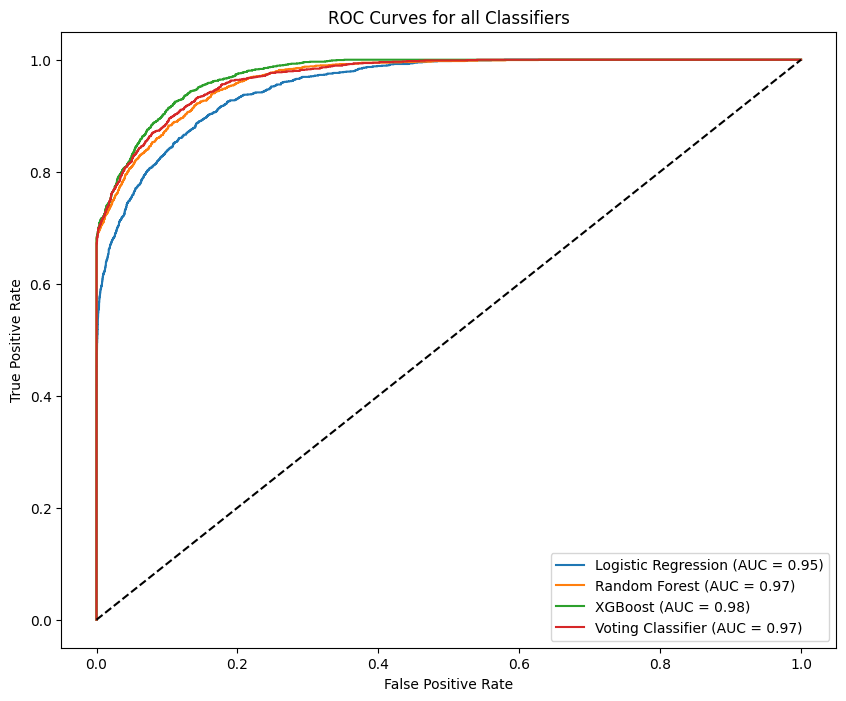

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Running Time (s),Confusion Matrix
0,Logistic Regression,0.879875,0.413080,0.860259,0.558148,0.954829,0.348317,"[[15461, 2073], [237, 1459]]"
1,Random Forest,0.946386,0.666500,0.784788,0.720823,0.968234,27.365472,"[[16868, 666], [365, 1331]]"
2,XGBoost,0.964379,0.841785,0.734080,0.784252,0.975445,8.883320,"[[17300, 234], [451, 1245]]"
3,Voting Classifier,0.948102,0.673459,0.798939,0.730852,0.970396,40.181628,"[[16877, 657], [341, 1355]]"


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Predicted_Logistic Regression,Predicted_Random Forest,Predicted_XGBoost,Predicted_Voting Classifier
82004,0,51.0,0,0,1,36.77,6.6,159,1,0,0,0
10542,1,12.0,0,0,0,22.29,4.5,90,0,0,0,0
31572,0,60.0,1,0,3,34.24,6.2,90,0,0,0,0
98055,1,80.0,0,0,3,24.39,4.0,100,0,0,0,0
49107,1,80.0,0,1,0,35.00,4.5,145,0,0,0,0


In [ ]:
# predicted table using best parameters + include all features + predictions for all models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
print("Loading data...")
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Clean the data
print("Cleaning data...")
diabetes_data_cleaned = diabetes_data.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables...")
for column in ['gender', 'smoking_history']:
    diabetes_data_cleaned[column] = LabelEncoder().fit_transform(diabetes_data_cleaned[column])

# Prepare data for modeling
X = diabetes_data_cleaned.drop('diabetes', axis=1)
y = diabetes_data_cleaned['diabetes']

# Split data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE and scale data
print("Applying SMOTE and scaling...")
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with the best known parameters directly
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.01),
    'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=200),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=0.01)),
            ('rf', RandomForestClassifier(max_depth=20, n_estimators=200)),
            ('xgb', XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150))
        ],
        voting='soft'
    )
}

# Initialize DataFrame to hold all predictions for the test set, including original features
predictions_df = X_test.copy()

# Collect metrics and train models
results = []
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    start_time = time()
    print(f"Training {name}...")
    clf.fit(X_train_smote_scaled, y_train_smote)

    elapsed_time = time() - start_time
    y_pred = clf.predict(X_test_scaled)
    y_probas = clf.predict_proba(X_test_scaled)[:, 1]
    predictions_df[f'Predicted_{name}'] = y_pred

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_probas):.2f})')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_probas),
        'Running Time (s)': elapsed_time,
        'Confusion Matrix': cm
    })

# Show ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Classifiers')
plt.legend()
plt.show()

# Display model performance summary
performance_df = pd.DataFrame(results)
display(performance_df)

# Display the predictions DataFrame
display(predictions_df.head())



In [ ]:
# Print the column names of the DataFrame
print(predictions_df.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level',
       'Predicted_Logistic Regression', 'Predicted_Random Forest',
       'Predicted_XGBoost', 'Predicted_Voting Classifier'],
      dtype='object')


In [ ]:
def calculate_risk_score(row, prediction_column):
    if row[prediction_column] == 0:
        return 0  # No risk score if not predicted as diabetic
    score = 0
    # Continue scoring as defined
    score += 1 if 7 < row['HbA1c_level'] <= 8 else 2 if 8 < row['HbA1c_level'] <= 9 else 3 if row['HbA1c_level'] > 9 else 0
    score += 1 if row['hypertension'] == 1 else 0
    score += 2 if row['heart_disease'] == 1 else 0
    score += 1 if 25 <= row['bmi'] < 30 else 2 if row['bmi'] >= 30 else 0
    score += 1 if 40 <= row['age'] < 50 else 2 if 50 <= row['age'] < 60 else 3 if row['age'] >= 60 else 0
    return score

def categorize_risk(score):
    if score == 0:
        return 'No Risk'
    elif 1 <= score <= 5:
        return 'Low Risk'
    elif 6 <= score <= 8:
        return 'Medium Risk'
    else:
        return 'High Risk'

model_predictions = ['Predicted_Logistic Regression', 'Predicted_Random Forest', 'Predicted_XGBoost', 'Predicted_Voting Classifier']
for model in model_predictions:
    predictions_df[model + '_Risk_Score'] = predictions_df.apply(lambda row: calculate_risk_score(row, model), axis=1)
    predictions_df[model + '_Risk_Category'] = predictions_df[model + '_Risk_Score'].apply(categorize_risk)

predictions_df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Predicted_Logistic Regression,Predicted_Random Forest,Predicted_XGBoost,Predicted_Voting Classifier,Predicted_Logistic Regression_Risk_Score,Predicted_Logistic Regression_Risk_Category,Predicted_Random Forest_Risk_Score,Predicted_Random Forest_Risk_Category,Predicted_XGBoost_Risk_Score,Predicted_XGBoost_Risk_Category,Predicted_Voting Classifier_Risk_Score,Predicted_Voting Classifier_Risk_Category
82004,0,51.0,0,0,1,36.77,6.6,159,1,0,0,0,4,Low Risk,0,No Risk,0,No Risk,0,No Risk
10542,1,12.0,0,0,0,22.29,4.5,90,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
31572,0,60.0,1,0,3,34.24,6.2,90,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
98055,1,80.0,0,0,3,24.39,4.0,100,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
49107,1,80.0,0,1,0,35.00,4.5,145,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
14248,0,16.0,0,0,4,19.69,4.0,126,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
28877,1,78.0,1,0,4,22.14,3.5,80,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
52552,1,78.0,0,0,0,35.49,4.5,155,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
10919,0,49.0,0,0,4,31.28,6.2,145,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
30225,0,16.0,0,0,4,24.55,5.0,155,0,0,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk


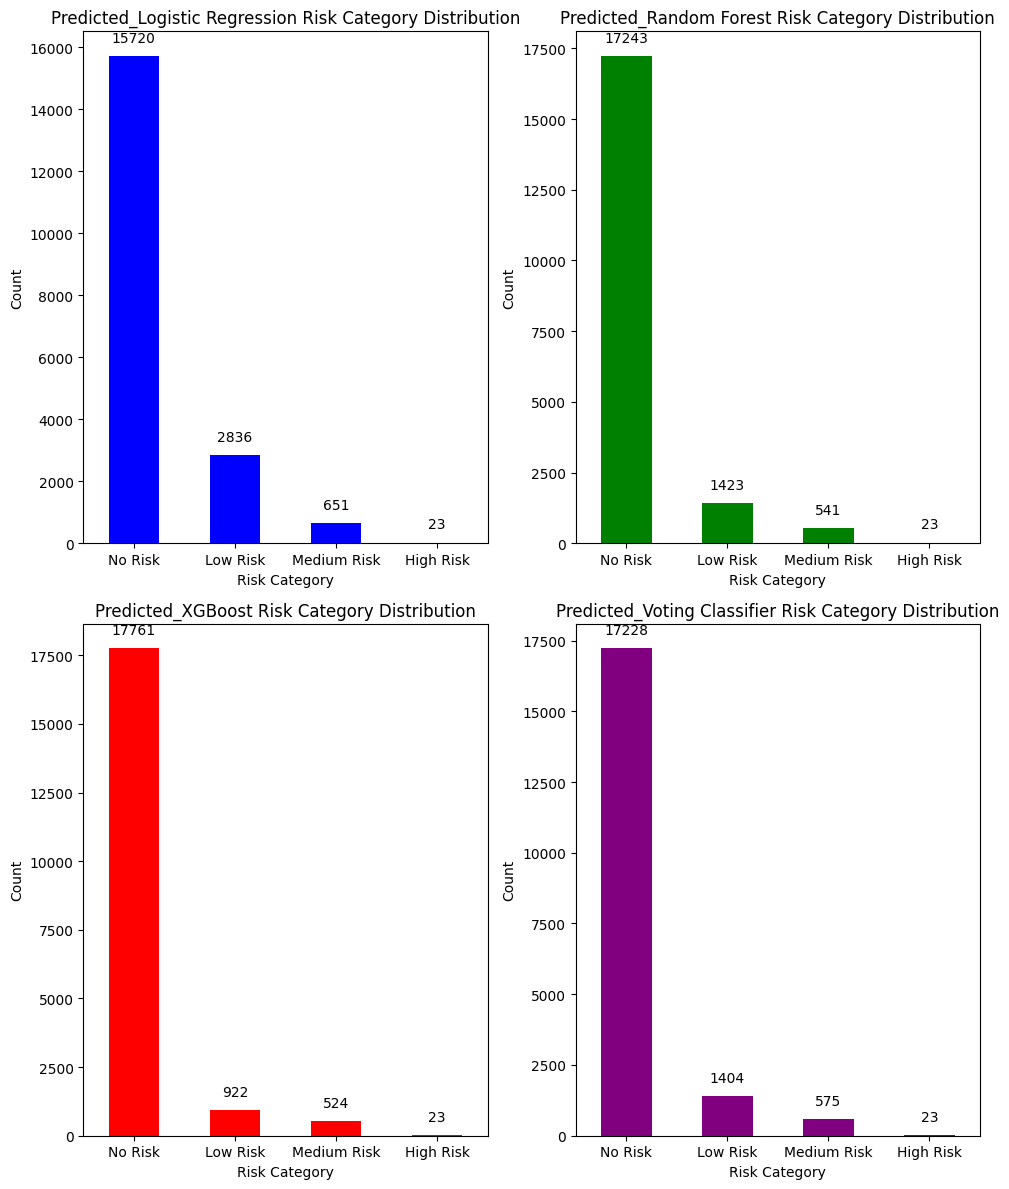

In [ ]:
import matplotlib.pyplot as plt

# Determine the colors for each model
colors = ['blue', 'green', 'red', 'purple']  # Colors for the four models

# Define the models to plot
models = ['Predicted_Logistic Regression', 'Predicted_Random Forest', 'Predicted_XGBoost', 'Predicted_Voting Classifier']

# Prepare the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))  # Adjust layout to 2x2 for four models
axes = axes.flatten()

# Loop over each model to plot their risk category distribution
for i, model in enumerate(models):
    ax = axes[i]
    risk_level_column = f'{model}_Risk_Category'

    # Ensure all risk categories are represented, even if there are no occurrences
    risk_counts = predictions_df[risk_level_column].value_counts().reindex(['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'], fill_value=0)

    # Plotting the risk counts
    bars = risk_counts.plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(f'{model} Risk Category Distribution')
    ax.set_xlabel('Risk Category')
    ax.set_ylabel('Count')
    ax.set_xticklabels(risk_counts.index, rotation=0)  # Set the x-tick labels to be horizontal

    # Adding text labels above bars for clarity
    for bar in bars.patches:
        ax.annotate(f'{int(bar.get_height())}',  # Place count above each bar
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom',
                    color='black', xytext=(0, 8),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
# List of models used for predictions
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Voting Classifier']

# Count how many diabetes cases each model predicted
diabetes_counts = {model: predictions_df[f'Predicted_{model}'].sum() for model in models}

# Display the counts for each model
diabetes_counts


{'Logistic Regression': 3532,
 'Random Forest': 1997,
 'XGBoost': 1479,
 'Voting Classifier': 2012}

In [ ]:
# Convert the dictionary to DataFrame for better visualization
diabetes_counts_df = pd.DataFrame(list(diabetes_counts.items()), columns=['Model', 'Predicted Diabetes Cases'])
print(diabetes_counts_df)


                 Model  Predicted Diabetes Cases
0  Logistic Regression                      3532
1        Random Forest                      1997
2              XGBoost                      1479
3    Voting Classifier                      2012


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_dataset.csv to new_dataset (4).csv


In [ ]:
# Now training ML on the whole original dataset to benefit fro the already knwon diabetes results and apply prediction on a new separate dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Calculate risk scores and categorize
def categorize_risk(score):
    if score == 0:
        return 'No Risk'
    elif score <= 4:
        return 'Low Risk'
    elif score <= 7:
        return 'Medium Risk'
    else:
        return 'High Risk'

# Load the full dataset
print("Loading data...")
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Clean the data
print("Cleaning data...")
diabetes_data_cleaned = diabetes_data.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables...")
for column in ['gender', 'smoking_history']:
    diabetes_data_cleaned[column] = LabelEncoder().fit_transform(diabetes_data_cleaned[column])

# Prepare data for modeling
X = diabetes_data_cleaned.drop('diabetes', axis=1)
y = diabetes_data_cleaned['diabetes']

# Apply SMOTE and scale data
print("Applying SMOTE and scaling...")
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

# Define classifiers with the best known parameters directly
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.01),
    'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=200),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=0.01)),
            ('rf', RandomForestClassifier(max_depth=20, n_estimators=200)),
            ('xgb', XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150))
        ],
        voting='soft'
    )
}

# Train models on the full dataset
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_smote_scaled, y_smote)

# Load the new dataset
new_data = pd.read_csv("new_dataset (4).csv")

# Drop the 'diabetes' column from the new dataset
X_new = new_data.drop('diabetes', axis=1)

# Clean the data
print("Cleaning new data...")
X_new_cleaned = X_new.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables in new data...")
for column in ['gender', 'smoking_history']:
    X_new_cleaned[column] = LabelEncoder().fit_transform(X_new_cleaned[column])

# Scale new data
print("Scaling new data...")
X_new_scaled = scaler.transform(X_new_cleaned)


# Predict on the new dataset
# Predict on the new dataset
new_predictions_df = new_data.copy()
for name, clf in classifiers.items():
    new_y_pred = clf.predict(X_new_scaled)
    new_predictions_df[f'Predicted_{name}'] = new_y_pred

# Define model_predictions
model_predictions = classifiers.keys()

# Calculate risk scores and categories
# Calculate risk scores and categories
def calculate_risk_score(row, model):
    if row[f'Predicted_{model}'] == 0:
        return 0  # No risk score if not predicted as diabetic
    else:
        # Continue scoring as defined
        score = 0
        score += 1 if 7 < row['HbA1c_level'] <= 8 else 2 if 8 < row['HbA1c_level'] <= 9 else 3 if row['HbA1c_level'] > 9 else 0
        score += 1 if row['hypertension'] == 1 else 0
        score += 2 if row['heart_disease'] == 1 else 0
        score += 1 if 25 <= row['bmi'] < 30 else 2 if row['bmi'] >= 30 else 0
        score += 1 if 40 <= row['age'] < 50 else 2 if 50 <= row['age'] < 60 else 3 if row['age'] >= 60 else 0
        # Scoring rule for smoking_history
        if 'smoking_history' in row:
            if row['smoking_history'] == 'never':
                score += 0
            elif row['smoking_history'] == 'ever':
                score += 1
            elif row['smoking_history'] == 'former':
                score += 2
            elif row['smoking_history'] == 'current':
                score += 3
            elif row['smoking_history'] == 'not current':
                score += 1
            elif row['smoking_history'] == 'No Info':
                score += 0
        # Scoring rule for gender
        if 'gender' in row:
            if row['gender'] == 'Male':
                score += 1
            elif row['gender'] == 'Female':
                score += 2
            elif row['gender'] == 'Other':
                score += 0
        # Scoring rule for blood_glucose_level
        if 'blood_glucose_level' in row:
            if row['blood_glucose_level'] < 100:
                score += 0
            elif 100 <= row['blood_glucose_level'] < 126:
                score += 1
            elif 126 <= row['blood_glucose_level'] < 200:
                score += 2
            elif row['blood_glucose_level'] >= 200:
                score += 3
        return score

for model in model_predictions:
    new_predictions_df[model + '_Risk_Score'] = new_predictions_df.apply(lambda row: calculate_risk_score(row, model), axis=1)
    new_predictions_df[model + '_Risk_Category'] = new_predictions_df[model + '_Risk_Score'].apply(categorize_risk)

# Display the new predictions DataFrame with risk scores and categories
display(new_predictions_df)

Loading data...
Cleaning data...
Encoding categorical variables...
Applying SMOTE and scaling...
Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training Voting Classifier...
Cleaning new data...
Encoding categorical variables in new data...
Scaling new data...


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Predicted_Logistic Regression,...,Predicted_XGBoost,Predicted_Voting Classifier,Logistic Regression_Risk_Score,Logistic Regression_Risk_Category,Random Forest_Risk_Score,Random Forest_Risk_Category,XGBoost_Risk_Score,XGBoost_Risk_Category,Voting Classifier_Risk_Score,Voting Classifier_Risk_Category
0,Female,80,0,1,never,26.00,6.6,142,NaN,1,...,0,0,10,High Risk,0,No Risk,0,No Risk,0,No Risk
1,Female,54,0,0,No Info,28.00,6.6,80,NaN,0,...,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
2,Male,28,0,0,never,27.00,5.7,159,NaN,0,...,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
3,Female,36,0,0,current,23.45,5.0,155,NaN,0,...,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
4,Male,76,1,1,current,20.00,4.8,155,NaN,0,...,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
5,Female,20,0,0,never,27.32,6.6,85,NaN,0,...,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
6,Female,90,0,0,ever,35.00,9.0,250,NaN,1,...,1,1,13,High Risk,13,High Risk,13,High Risk,13,High Risk
7,Female,24,1,1,No Info,27.32,6.6,80,NaN,0,...,0,0,0,No Risk,0,No Risk,0,No Risk,0,No Risk
8,Male,37,0,0,never,44.00,7.0,230,NaN,1,...,1,1,6,Medium Risk,6,Medium Risk,6,Medium Risk,6,Medium Risk
9,Female,44,0,1,current,23.45,5.0,300,NaN,1,...,0,1,11,High Risk,11,High Risk,0,No Risk,11,High Risk


In [ ]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


Loading data...
Cleaning data...
Encoding categorical variables...
Splitting data...
Applying BorderlineSMOTE and scaling...
Training and tuning Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 0.1}
Training and tuning Random Forest...
Best hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 300}
Training and tuning XGBoost...
Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
Training and tuning Voting Classifier...


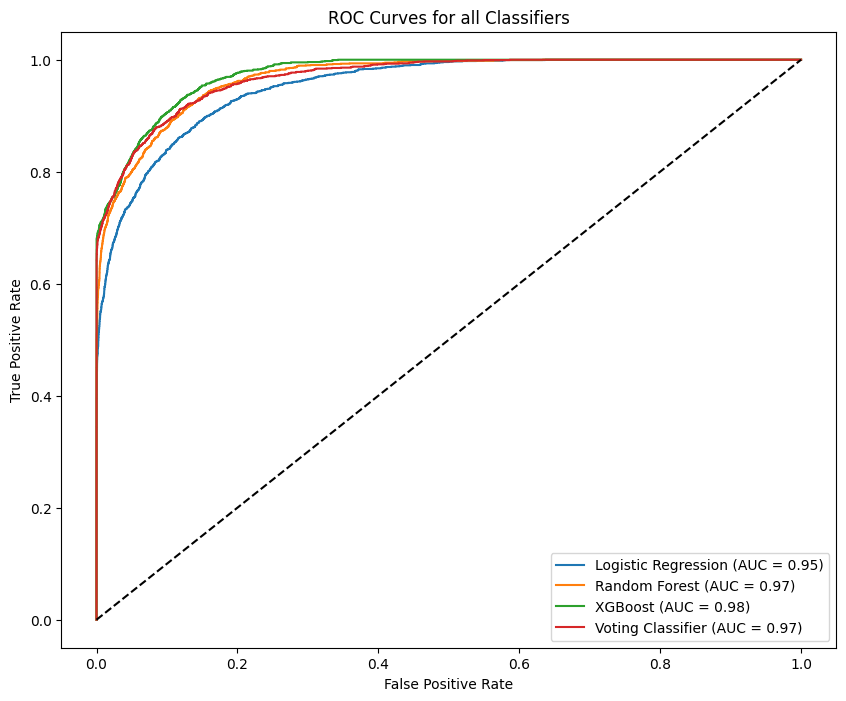

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Running Time (s),Confusion Matrix
0,Logistic Regression,0.860062,0.375656,0.886203,0.527646,0.953037,2.844599,"[[15036, 2498], [193, 1503]]"
1,Random Forest,0.936453,0.605804,0.800118,0.689533,0.968058,950.399149,"[[16651, 883], [339, 1357]]"
2,XGBoost,0.952522,0.714286,0.769458,0.740846,0.975019,43.765607,"[[17012, 522], [391, 1305]]"
3,Voting Classifier,0.946854,0.664390,0.803066,0.727176,0.968929,17.103075,"[[16846, 688], [334, 1362]]"


,Predicted_Logistic Regression,Predicted_Random Forest,Predicted_XGBoost,Predicted_Voting Classifier
82004,1,0,0,0
10542,0,0,0,0
31572,0,0,0,0
98055,0,0,0,0
49107,0,0,0,0


In [ ]:
# NEW PART USING ANOTHER IMBALNCED HANDLEING TECHNIQUES like BorderlineSMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE  # Import BorderlineSMOTE

# Load the cleaned dataset
print("Loading data...")
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Clean the data
print("Cleaning data...")
diabetes_data_cleaned = diabetes_data.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables...")
for column in ['gender', 'smoking_history']:
    diabetes_data_cleaned[column] = LabelEncoder().fit_transform(diabetes_data_cleaned[column])

# Prepare data for modeling
X = diabetes_data_cleaned.drop('diabetes', axis=1)
y = diabetes_data_cleaned['diabetes']

# Split data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply BorderlineSMOTE and scale data
print("Applying BorderlineSMOTE and scaling...")
X_train_smote, y_train_smote = BorderlineSMOTE(random_state=42).fit_resample(X_train, y_train)  # Use BorderlineSMOTE here
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define classifiers and parameter grids
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('rf', RandomForestClassifier()),
            ('xgb', XGBClassifier())
        ],
        voting='soft'
    )
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 15, 20]},
    'XGBoost': {'n_estimators': [100, 150], 'max_depth': [4, 6], 'learning_rate': [0.1, 0.01]},
    'Voting Classifier': {}  # Empty dictionary, assuming no parameters to tune yet
}

# New DataFrame to hold all predictions for the test set
predictions_df = pd.DataFrame(index=X_test.index)

# Collect metrics and train models
results = []
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    start_time = time()
    print(f"Training and tuning {name}...")
    if param_grids[name]:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='roc_auc')
        grid_search.fit(X_train_smote_scaled, y_train_smote)
        best_clf = grid_search.best_estimator_
        # Print the best hyperparameters
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    else:
        best_clf = clf
        best_clf.fit(X_train_smote_scaled, y_train_smote)

    elapsed_time = time() - start_time
    y_pred = best_clf.predict(X_test_scaled)
    y_probas = best_clf.predict_proba(X_test_scaled)[:, 1]
    predictions_df[f'Predicted_{name}'] = y_pred

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_probas):.2f})')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_probas),
        'Running Time (s)': elapsed_time,
        'Confusion Matrix': cm
    })

# Show ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Classifiers')
plt.legend()
plt.show()

# Display model performance summary
performance_df = pd.DataFrame(results)
display(performance_df)

# Display the predictions DataFrame
display(predictions_df.head())

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


Loading data...
Cleaning data...
Encoding categorical variables...
Splitting data...
Applying SMOTE and scaling...
Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training Voting Classifier...


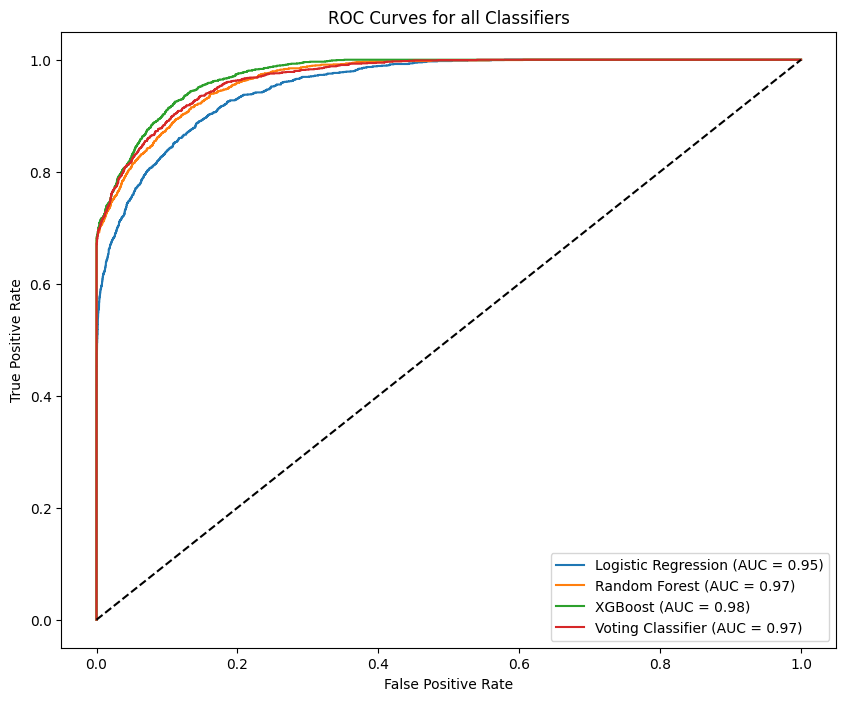

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Running Time (s),Confusion Matrix
0,Logistic Regression,0.906344,0.481714,0.815448,0.605649,0.954829,0.264111,"[[16046, 1488], [313, 1383]]"
1,Random Forest,0.958658,0.779640,0.740566,0.759601,0.968689,26.816174,"[[17179, 355], [440, 1256]]"
2,XGBoost,0.970203,0.936965,0.709906,0.807783,0.975445,1.323363,"[[17453, 81], [492, 1204]]"
3,Voting Classifier,0.962611,0.822868,0.734080,0.775943,0.970382,26.425162,"[[17266, 268], [451, 1245]]"


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Predicted_Logistic Regression,Predicted_Random Forest,Predicted_XGBoost,Predicted_Voting Classifier
82004,0,51.0,0,0,1,36.77,6.6,159,1,0,0,0
10542,1,12.0,0,0,0,22.29,4.5,90,0,0,0,0
31572,0,60.0,1,0,3,34.24,6.2,90,0,0,0,0
98055,1,80.0,0,0,3,24.39,4.0,100,0,0,0,0
49107,1,80.0,0,1,0,35.00,4.5,145,0,0,0,0


In [5]:
# Implement ML w2ith a lower threshold with best hyperparameter tuning, lowered prediction thrrshold from 0.5 to 0.3 (>0.5 => 1 and lower mean 0 or non -diabetic) SMOT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
print("Loading data...")
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Clean the data
print("Cleaning data...")
diabetes_data_cleaned = diabetes_data.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables...")
label_encoders = {}
for column in ['gender', 'smoking_history']:
    label_encoder = LabelEncoder()
    diabetes_data_cleaned[column] = label_encoder.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = label_encoder

# Prepare data for modeling
X = diabetes_data_cleaned.drop('diabetes', axis=1)
y = diabetes_data_cleaned['diabetes']

# Split data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE and scale data
print("Applying SMOTE and scaling...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with the best known parameters directly
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.01),
    'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=200),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=0.01)),
            ('rf', RandomForestClassifier(max_depth=20, n_estimators=200)),
            ('xgb', XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150))
        ],
        voting='soft'
    )
}

# Initialize DataFrame to hold all predictions for the test set, including original features
predictions_df = X_test.copy()

# Collect metrics and train models
results = []
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    start_time = time()
    print(f"Training {name}...")
    clf.fit(X_train_smote_scaled, y_train_smote)

    elapsed_time = time() - start_time
    y_probas = clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probas >= 0.6).astype(int)  # Adjusted prediction threshold
    predictions_df[f'Predicted_{name}'] = y_pred

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_probas):.2f})')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_probas),
        'Running Time (s)': elapsed_time,
        'Confusion Matrix': cm
    })

# Show ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Classifiers')
plt.legend()
plt.show()

# Display model performance summary
performance_df = pd.DataFrame(results)
display(performance_df)

# Display the predictions DataFrame
display(predictions_df.head())


Loading data...
Cleaning data...
Encoding categorical variables...
Splitting data...
Applying SMOTE and scaling...
Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training Voting Classifier...


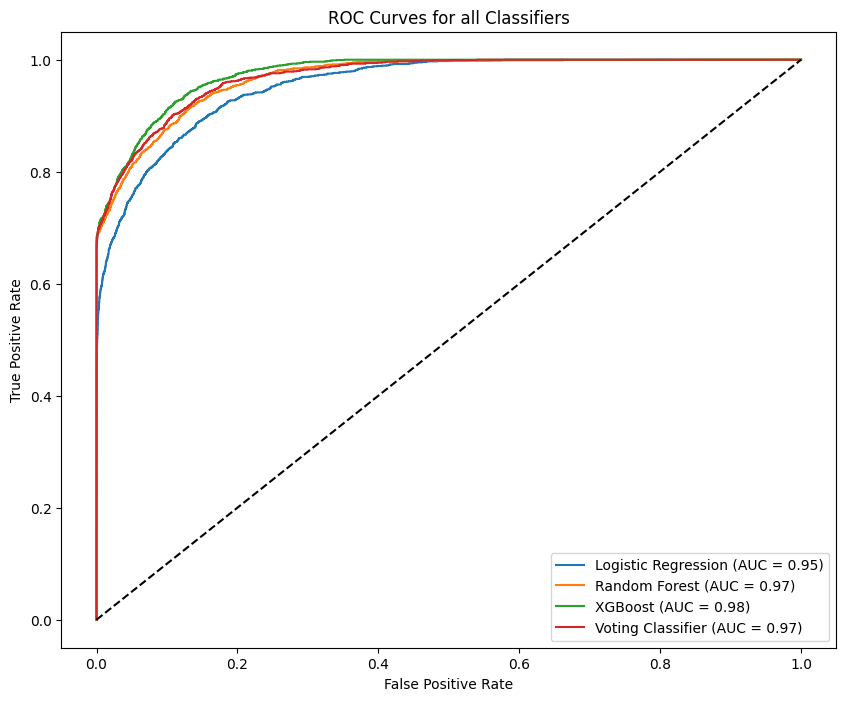

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Running Time (s),Confusion Matrix
0,Logistic Regression,0.781539,0.280225,0.941627,0.431913,0.954829,0.329488,"[[13432, 4102], [99, 1597]]"
1,Random Forest,0.886271,0.430077,0.890330,0.579988,0.968202,26.290070,"[[15533, 2001], [186, 1510]]"
2,XGBoost,0.917681,0.519584,0.883844,0.654442,0.975445,2.742484,"[[16148, 1386], [197, 1499]]"
3,Voting Classifier,0.857046,0.375385,0.935142,0.535720,0.970287,25.459364,"[[14895, 2639], [110, 1586]]"


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Predicted_Logistic Regression,Predicted_Random Forest,Predicted_XGBoost,Predicted_Voting Classifier
82004,0,51.0,0,0,1,36.77,6.6,159,1,0,1,1
10542,1,12.0,0,0,0,22.29,4.5,90,0,0,0,0
31572,0,60.0,1,0,3,34.24,6.2,90,0,0,0,0
98055,1,80.0,0,0,3,24.39,4.0,100,0,0,0,0
49107,1,80.0,0,1,0,35.00,4.5,145,0,0,0,0


In [7]:
# Implement ML w2ith a lower threshold with best hyperparameter tuning, lowered prediction thrrshold from 0.5 to 0.3 (>0.5 => 1 and lower mean 0 or non -diabetic) SMOT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
print("Loading data...")
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Clean the data
print("Cleaning data...")
diabetes_data_cleaned = diabetes_data.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables...")
label_encoders = {}
for column in ['gender', 'smoking_history']:
    label_encoder = LabelEncoder()
    diabetes_data_cleaned[column] = label_encoder.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = label_encoder

# Prepare data for modeling
X = diabetes_data_cleaned.drop('diabetes', axis=1)
y = diabetes_data_cleaned['diabetes']

# Split data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE and scale data
print("Applying SMOTE and scaling...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with the best known parameters directly
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.01),
    'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=200),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=0.01)),
            ('rf', RandomForestClassifier(max_depth=20, n_estimators=200)),
            ('xgb', XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150))
        ],
        voting='soft'
    )
}

# Initialize DataFrame to hold all predictions for the test set, including original features
predictions_df = X_test.copy()

# Collect metrics and train models
results = []
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    start_time = time()
    print(f"Training {name}...")
    clf.fit(X_train_smote_scaled, y_train_smote)

    elapsed_time = time() - start_time
    y_probas = clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probas >= 0.25).astype(int)  # Adjusted prediction threshold
    predictions_df[f'Predicted_{name}'] = y_pred

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_probas):.2f})')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_probas),
        'Running Time (s)': elapsed_time,
        'Confusion Matrix': cm
    })

# Show ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Classifiers')
plt.legend()
plt.show()

# Display model performance summary
performance_df = pd.DataFrame(results)
display(performance_df)

# Display the predictions DataFrame
display(predictions_df.head())


Loading data...
Cleaning data...
Encoding categorical variables...
Splitting data...
Applying SMOTE and scaling...
Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training Voting Classifier...


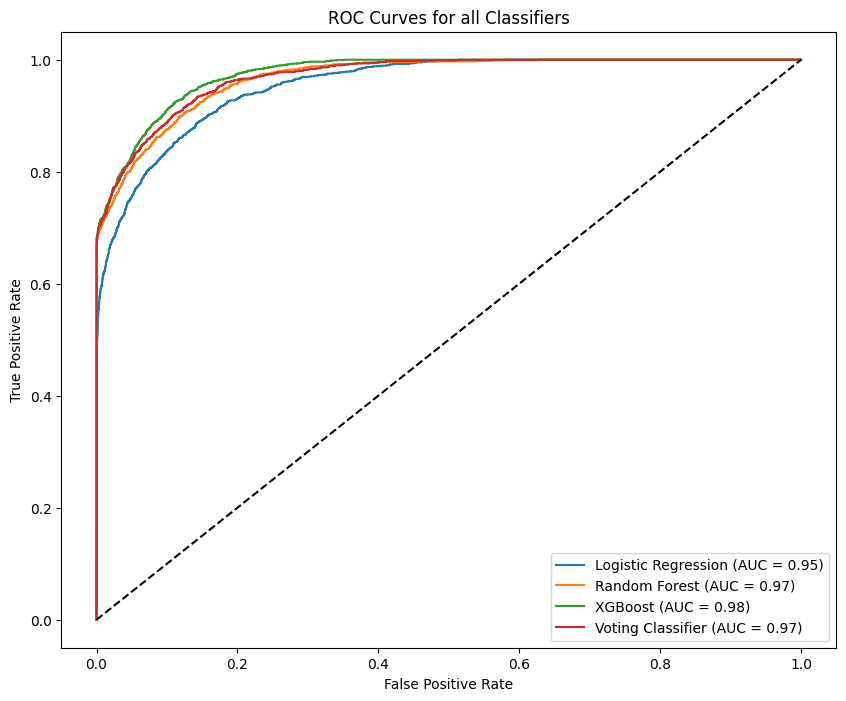

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Running Time (s),Confusion Matrix
0,Logistic Regression,0.849922,0.359338,0.896226,0.512994,0.954829,0.263994,"[[14824, 2710], [176, 1520]]"
1,Random Forest,0.927665,0.560878,0.828420,0.668888,0.968033,25.806485,"[[16434, 1100], [291, 1405]]"
2,XGBoost,0.954082,0.718431,0.788325,0.751757,0.975445,1.291959,"[[17010, 524], [359, 1337]]"
3,Voting Classifier,0.920749,0.531387,0.858491,0.656447,0.970437,25.257277,"[[16250, 1284], [240, 1456]]"


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Predicted_Logistic Regression,Predicted_Random Forest,Predicted_XGBoost,Predicted_Voting Classifier
82004,0,51.0,0,0,1,36.77,6.6,159,1,0,0,1
10542,1,12.0,0,0,0,22.29,4.5,90,0,0,0,0
31572,0,60.0,1,0,3,34.24,6.2,90,0,0,0,0
98055,1,80.0,0,0,3,24.39,4.0,100,0,0,0,0
49107,1,80.0,0,1,0,35.00,4.5,145,0,0,0,0


In [9]:
# Implement ML w2ith a lower threshold with best hyperparameter tuning, lowered prediction thrrshold from 0.5 to 0.3 (>0.5 => 1 and lower mean 0 or non -diabetic) SMOT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
print("Loading data...")
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Clean the data
print("Cleaning data...")
diabetes_data_cleaned = diabetes_data.dropna().drop_duplicates()

# Encode categorical variables
print("Encoding categorical variables...")
label_encoders = {}
for column in ['gender', 'smoking_history']:
    label_encoder = LabelEncoder()
    diabetes_data_cleaned[column] = label_encoder.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = label_encoder

# Prepare data for modeling
X = diabetes_data_cleaned.drop('diabetes', axis=1)
y = diabetes_data_cleaned['diabetes']

# Split data
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE and scale data
print("Applying SMOTE and scaling...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with the best known parameters directly
classifiers = {
    'Logistic Regression': LogisticRegression(C=0.01),
    'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=200),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=0.01)),
            ('rf', RandomForestClassifier(max_depth=20, n_estimators=200)),
            ('xgb', XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150))
        ],
        voting='soft'
    )
}

# Initialize DataFrame to hold all predictions for the test set, including original features
predictions_df = X_test.copy()

# Collect metrics and train models
results = []
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    start_time = time()
    print(f"Training {name}...")
    clf.fit(X_train_smote_scaled, y_train_smote)

    elapsed_time = time() - start_time
    y_probas = clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probas >= 0.4).astype(int)  # Adjusted prediction threshold
    predictions_df[f'Predicted_{name}'] = y_pred

    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_probas):.2f})')

    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_probas),
        'Running Time (s)': elapsed_time,
        'Confusion Matrix': cm
    })

# Show ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all Classifiers')
plt.legend()
plt.show()

# Display model performance summary
performance_df = pd.DataFrame(results)
display(performance_df)

# Display the predictions DataFrame
display(predictions_df.head())
